<a href="https://colab.research.google.com/github/MihirRajeshPanchal/DataHack-Thunderflow/blob/main/Food_Calorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os.path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
image_dir = Path('/content/drive/MyDrive/Datahack 2.0/Indian-Food/Indian Food Images')

In [7]:
filepath = list(image_dir.glob(r'**/*.jpg'))
label = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], filepath))

In [8]:
filepath = pd.Series(filepath, name = 'Filepath').astype(str)
label = pd.Series(label, name = 'Label')
image_df = pd.concat([filepath, label], axis = 1).sample(frac = 1.0, random_state = 1).reset_index(drop = True)
image_df.head()

,Filepath,Label
0,/content/drive/MyDrive/Datahack 2.0/Indian-Foo...,butter_chicken
1,/content/drive/MyDrive/Datahack 2.0/Indian-Foo...,qubani_ka_meetha
2,/content/drive/MyDrive/Datahack 2.0/Indian-Foo...,kachori
3,/content/drive/MyDrive/Datahack 2.0/Indian-Foo...,makki_di_roti_sarson_da_saag
4,/content/drive/MyDrive/Datahack 2.0/Indian-Foo...,chicken_tikka


In [16]:
image_df['Label'].unique()


array(['butter_chicken', 'qubani_ka_meetha', 'kachori',
       'makki_di_roti_sarson_da_saag', 'chicken_tikka',
       'paneer_butter_masala', 'imarti', 'cham_cham', 'kofta', 'poha',
       'modak', 'pithe', 'misti_doi', 'sandesh', 'adhirasam',
       'aloo_matar', 'poornalu', 'kadai_paneer', 'chicken_tikka_masala',
       'bandar_laddu', 'chana_masala', 'gavvalu', 'unni_appam',
       'lyangcha', 'chak_hao_kheer', 'bhatura', 'kuzhi_paniyaram',
       'aloo_methi', 'palak_paneer', 'mysore_pak', 'misi_roti',
       'karela_bharta', 'ghevar', 'sheer_korma', 'chapati', 'ledikeni',
       'gajar_ka_halwa', 'sutar_feni', 'dal_makhani', 'shrikhand',
       'navrattan_korma', 'dum_aloo', 'daal_baati_churma', 'dal_tadka',
       'jalebi', 'maach_jhol', 'rasgulla', 'lassi', 'pootharekulu',
       'bhindi_masala', 'sohan_papdi', 'kalakand', 'aloo_gobi',
       'doodhpak', 'malapua', 'ariselu', 'shankarpali', 'phirni',
       'litti_chokha', 'chicken_razala', 'gulab_jamun', 'biryani',
       'kaj

In [17]:
food_calories = {
    "butter_chicken": 350,
    "qubani_ka_meetha": 400,
    "kachori": 250,
    "makki_di_roti_sarson_da_saag": 150,
    "chicken_tikka": 200,
    "paneer_butter_masala": 300,
    "imarti": 450,
    "cham_cham": 350,
    "kofta": 250,
    "poha": 150,
    "modak": 200,
    "pithe": 250,
    "misti_doi": 200,
    "sandesh": 300,
    "adhirasam": 250,
    "aloo_matar": 200,
    "poornalu": 250,
    "kadai_paneer": 300,
    "chicken_tikka_masala": 200,
    "bandar_laddu": 450,
    "chana_masala": 250,
    "gavvalu": 200,
    "unni_appam": 250,
    "lyangcha": 350,
    "chak_hao_kheer": 400,
    "bhatura": 250,
    "kuzhi_paniyaram": 200,
    "aloo_methi": 200,
    "palak_paneer": 300,
    "mysore_pak": 450,
    "misi_roti": 200,
    "karela_bharta": 250,
    "ghevar": 400,
    "sheer_korma": 350,
    "chapati": 150,
    "ledikeni": 250,
    "gajar_ka_halwa": 450,
    "sutar_feni": 400,
    "dal_makhani": 300,
    "shrikhand": 200,
    "navrattan_korma": 350,
    "dum_aloo": 200,
    "daal_baati_churma": 250,
    "dal_tadka": 200,
    "jalebi": 450,
    "maach_jhol": 250,
    "rasgulla": 200,
    "lassi": 150,
    "pootharekulu": 200,
    "bhindi_masala": 250,
    "sohan_papdi": 400,
    "kalakand": 450,
    "aloo_gobi": 200,
    "doodhpak": 200,
    "malapua": 250,
    "ariselu": 200,
    "shankarpali": 350,
    "phirni": 400,
    "litti_chokha": 250,
    "chicken_razala": 200,
    "gulab_jamun": 450,
    "biryani": 350,
    "kajjikaya": 200,
    "sohan_halwa": 400,
    "ras_malai": 350,
    "aloo_tikki": 200,
    "dharwad_pedha": 450,
    "sheera": 200,
    "anarsa": 250,
    "chhena_kheeri": 200,
    "basundi": 250,
    "kakinada_khaja": 400,
    "rabri": 200,
    "naan": 150,
    "kadhi_pakoda": 250,
    "chikki":500,
    "aloo_shimla_mirch":150,
    "double_ka_meetha":400,
    "daal_puri":200,
    "boondi":400,
}


In [19]:
calories_array = list(food_calories.values())
calories_array

[350,
 400,
 250,
 150,
 200,
 300,
 450,
 350,
 250,
 150,
 200,
 250,
 200,
 300,
 250,
 200,
 250,
 300,
 200,
 450,
 250,
 200,
 250,
 350,
 400,
 250,
 200,
 200,
 300,
 450,
 200,
 250,
 400,
 350,
 150,
 250,
 450,
 400,
 300,
 200,
 350,
 200,
 250,
 200,
 450,
 250,
 200,
 150,
 200,
 250,
 400,
 450,
 200,
 200,
 250,
 200,
 350,
 400,
 250,
 200,
 450,
 350,
 200,
 400,
 350,
 200,
 450,
 200,
 250,
 200,
 250,
 400,
 200,
 150,
 250,
 500,
 150,
 400,
 200,
 400]

In [21]:
import pandas as pd
image_df['calories'] = image_df['Label'].map(food_calories)
print(image_df)


                                               Filepath  \
0     /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
1     /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
2     /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
3     /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
4     /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
...                                                 ...   
4005  /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
4006  /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
4007  /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
4008  /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   
4009  /content/drive/MyDrive/Datahack 2.0/Indian-Foo...   

                             Label  calories  
0                   butter_chicken       350  
1                 qubani_ka_meetha       400  
2                          kachori       250  
3     makki_di_roti_sarson_da_saag       150  
4                    chicken_tikka       200  
...      

In [22]:
le = LabelEncoder()
image_df['Label'] = le.fit_transform(image_df['Label'])
image_df['Label'].value_counts()

18    58
71    52
14    50
43    50
49    50
      ..
46    50
10    50
15    50
50    50
13    50
Name: Label, Length: 80, dtype: int64

In [23]:
train_df, test_df = train_test_split(image_df, test_size = 0.30, shuffle = True, random_state = 1)

In [24]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                           validation_split = 0.2)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [28]:
import pandas as pd

def convert_to_string_list_or_tuple(df, y_col):
  """Converts the values in the given column to strings, lists, or tuples.

  Args:
    df: A Pandas DataFrame.
    y_col: The name of the column to convert.

  Returns:
    The column with the converted values.
  """

  if not isinstance(df[y_col].iloc[0], str):
    df[y_col] = df[y_col].astype('str')
  if not isinstance(df[y_col].iloc[0], (list, tuple)):
    df[y_col] = df[y_col].apply(lambda x: [x])
  return df[y_col]

# Convert the values in the "Label" column to strings, lists, or tuples
train_df['Label'] = convert_to_string_list_or_tuple(train_df, 'Label')


In [30]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Create a training generator
train_gen = ImageDataGenerator(rescale=1./255., validation_split=0.2)
train_image = train_gen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Filepath',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = True,
                                           seed = 42,
                                           subset = 'training')

# Create a validation generator
val_gen = ImageDataGenerator(rescale=1./255., validation_split=0.2)
val_image = val_gen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Filepath',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = True,
                                           seed = 42,
                                           subset = 'validation')

# Create a test generator
test_df['Label'] = test_df['Label'].astype('str')

# Create the test generator
test_gen = ImageDataGenerator(rescale=1./255.)
test_image = test_gen.flow_from_dataframe(dataframe = test_df,
                                           x_col = 'Filepath',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = False)


Found 2246 validated image filenames belonging to 80 classes.
Found 561 validated image filenames belonging to 80 classes.
Found 1203 validated image filenames belonging to 80 classes.


In [34]:
inputs = tf.keras.Input(shape = (120,120,3))
x = tf.keras.layers.Conv2D(filters = 16, kernel_size =(3,3), activation = 'relu' )(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu' )(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'linear')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['accuracy'])
history  = model.fit(train_image,
                    validation_data = val_image,
                    epochs = 10,
                    callbacks = [tf.keras.callbacks.EarlyStopping(
                    monitor = 'val_loss',
                    patience = 5,
                    restore_best_weights = True)])

Epoch 1/10
71/71 [==============================] - 111s 2s/step - loss: 0.0124 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 2/10
71/71 [==============================] - 113s 2s/step - loss: 0.0123 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 3/10
71/71 [==============================] - 129s 2s/step - loss: 0.0123 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 4/10
71/71 [==============================] - 120s 2s/step - loss: 0.0123 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 5/10
71/71 [==============================] - 104s 1s/step - loss: 0.0123 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 6/10
71/71 [==============================] - 104s 1s/step - loss: 0.0123 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 7/10
71/71 [==============================] - 106s 1s/step - loss: 0.0123 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 0.9875
Epoch 8/10
71

In [36]:
result = model.evaluate(test_image, verbose = 0)
print('Test Loss : {:.3f}'.format(result[0]))
print('Test Accuracy : {:.3f}%'.format(result[1]*100))

Test Loss : 0.012
Test Accuracy : 98.750%


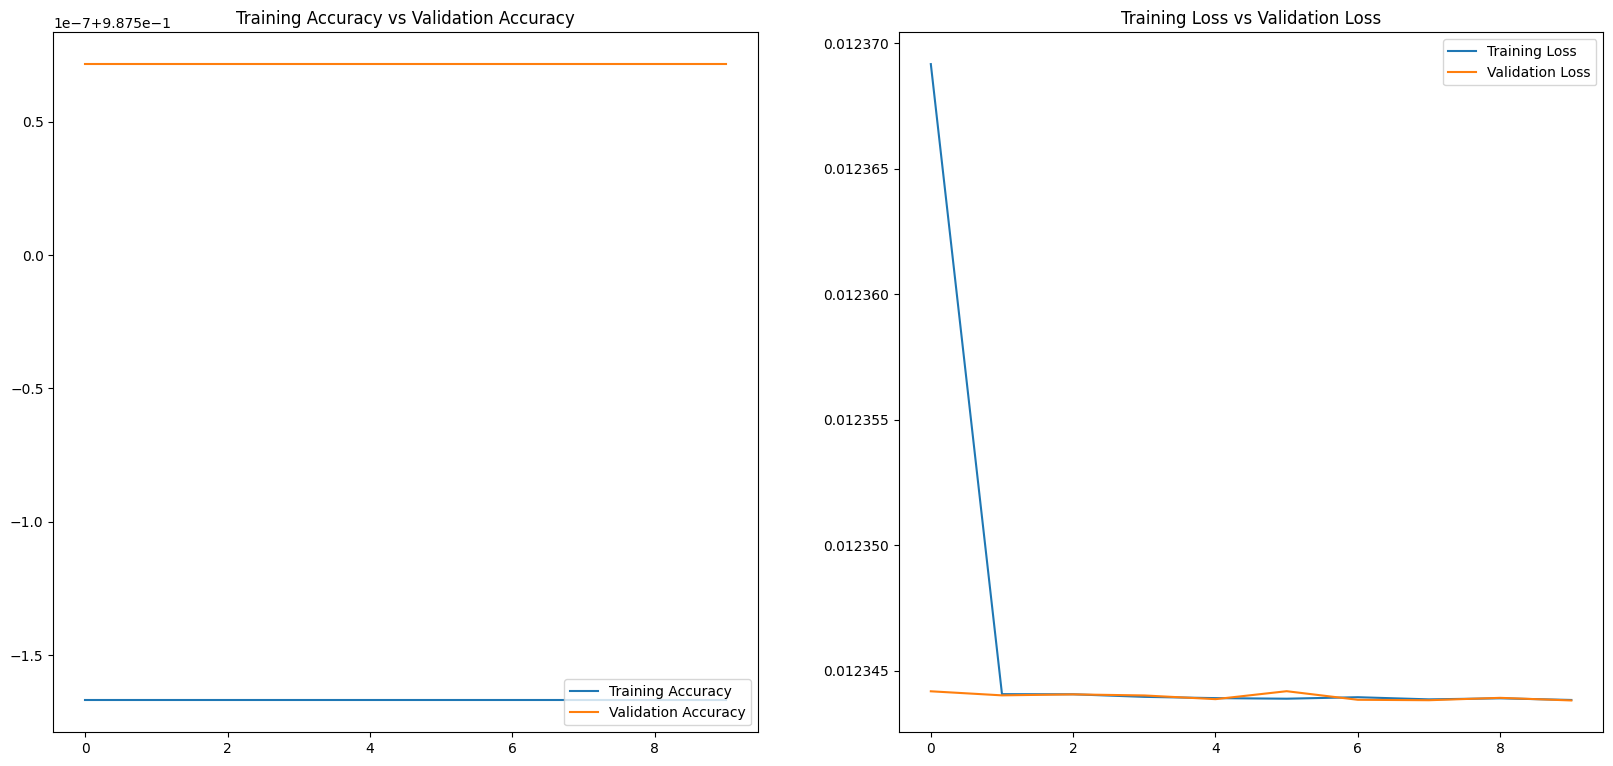

In [37]:
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
plt.plot(range(10),history.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(10), history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(loc = 'lower right')
plt.subplot(2,2,2)
plt.plot(range(10),history.history['loss'], label = 'Training Loss')
plt.plot(range(10), history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc = 'upper right')
plt.show()


In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np

sample_image_path = '/content/drive/MyDrive/Datahack 2.0/Indian-Food/Indian Food Images/Indian Food Images/butter_chicken/00a258a357.jpg'
img = image.load_img(sample_image_path, target_size=(120, 120))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255
predictions = model.predict(img)
predicted_class = np.argmax(predictions)
class_labels = list(food_calories.keys())
predicted_label = class_labels[predicted_class]

print(f"The model predicts the sample image as: {predicted_label}")


1/1 [==============================] - 0s 347ms/step
The model predicts the sample image as: butter_chicken


In [40]:
predicted_label = class_labels[predicted_class]
calorie_value = food_calories.get(predicted_label, "unknown")
print(f"Your food {predicted_label} has approximately {calorie_value} calories")


Your food butter_chicken has approximately 350 calories


In [41]:
import pickle

with open('my_pickled_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [42]:
from google.colab import files

files.download('my_pickled_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>